In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import torch


In [2]:
train_df = pd.read_csv("./data/pointcloudmnist2d/train.csv")
test_df = pd.read_csv("./data/pointcloudmnist2d/test.csv")

In [3]:
train_df.head()

,label,x0,y0,v0,x1,y1,v1,x2,y2,v2,...,v347,x348,y348,v348,x349,y349,v349,x350,y350,v350
0,5,17,10,249,16,6,81,13,14,241,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,0,22,17,50,8,8,225,22,15,195,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,4,8,12,207,10,11,98,19,20,2,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,1,8,6,48,11,8,251,14,13,251,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,9,17,15,253,16,4,56,9,14,176,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
y_train = np.array(train_df['label']).reshape(-1,1)
y_test = np.array(test_df['label']).reshape(-1,1)

y_train.shape

(60000, 1)

In [5]:
X_train = np.array(train_df.drop(["label"],axis=1))
X_test = np.array(test_df.drop(["label"],axis=1))

# X_train = np.array(train_df.loc[:, 'x0':'v350'])
# X_test = np.array(test_df.loc[:, 'x0':'v350'])


In [6]:
X_train

array([[ 17,  10, 249, ...,  -1,  -1,  -1],
       [ 22,  17,  50, ...,  -1,  -1,  -1],
       [  8,  12, 207, ...,  -1,  -1,  -1],
       ...,
       [ 14,  13, 253, ...,  -1,  -1,  -1],
       [ 10,  14, 253, ...,  -1,  -1,  -1],
       [  7,   6, 254, ...,  -1,  -1,  -1]])

In [7]:
# demo = X_train.iloc[0]
 X_train[0]

array([ 17,  10, 249, ...,  -1,  -1,  -1])

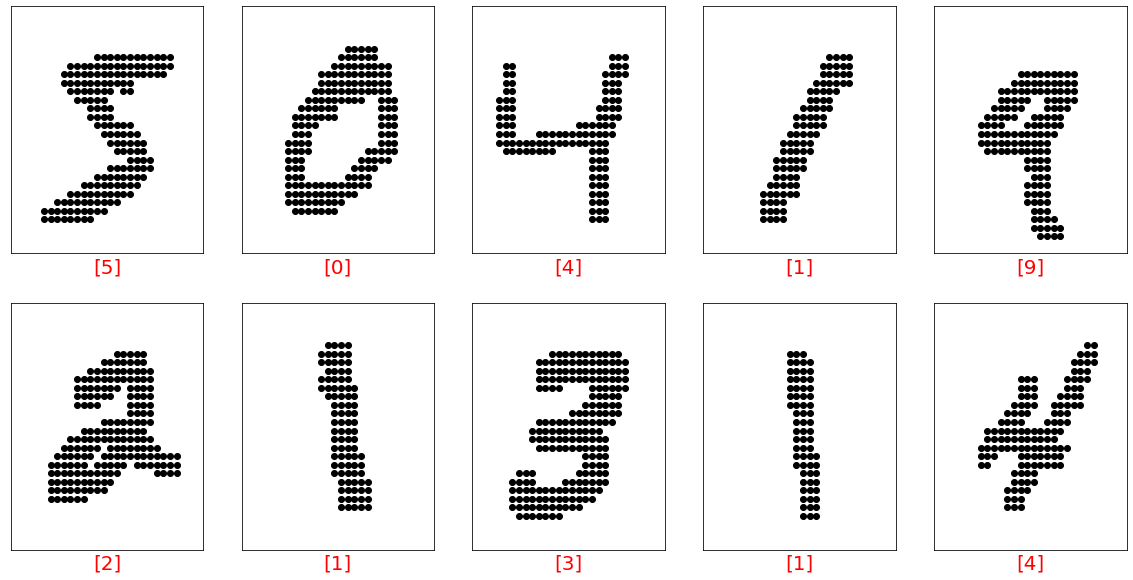

In [8]:
#visualize the first 10 training images 
i, x, y = 0, 0, 0

plt.figure(figsize=(20,10))
for num_fig in range(10):
    plt.subplot(2, 5, num_fig+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlim(-1, 28)
    plt.ylim(-1, 28)
    plt.xlabel(y_train[num_fig], size=20, color='red')
    i = 0
    for val in X_train[num_fig]:
        if val != -1:
            if i % 3 == 0:
                x = val
            if i % 3 == 1:
                y = val
            if i % 3 == 2:
                plt.scatter(x, y, color='black')
                #print(i)
        #print(val)
       
        i += 1
